# CSE 202 Homework 2
## Dijkstra's Algorithm: Decrease-Key Operations Analysis

This notebook analyzes how the number of decrease-key operations scales with $n$ for complete graphs with random edge weights in $[0, 1]$.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

# option to save figures to out/ folder
SAVE_FIGURES = True
OUT_DIR = Path.cwd().parent / "out/hw2"
OUT_DIR.mkdir(exist_ok=True)

## Data Loading

**Have to run the helper script (hw2_dijkstra.py) first.**

In [22]:
# load results from the experiment
with open(OUT_DIR / "hw2_dijkstra_results.json", "r") as f:
    results = json.load(f)

n_values = np.array(results['n_values'])
avg_dk = np.array(results['avg_decrease_keys'])
std_dk = np.array(results['std_decrease_keys'])
worst_case = np.array(results['worst_case'])

print(f"loaded data for n = {list(n_values)}")

loaded data for n = [np.int64(50), np.int64(100), np.int64(200), np.int64(300), np.int64(500), np.int64(750), np.int64(1000), np.int64(1500), np.int64(2000), np.int64(2500), np.int64(3000)]


## Results

In [23]:
print(f"{'n':>6} | {'Avg DK':>10} | {'Std DK':>8} | {'Worst-Case':>12} | {'Ratio':>8} | {'DK/nlogn':>10}")
print("-" * 70)

for i, n in enumerate(n_values):
    ratio = avg_dk[i] / worst_case[i]
    nlogn_ratio = avg_dk[i] / (n * np.log(n))
    print(f"{n:>6} | {avg_dk[i]:>10.1f} | {std_dk[i]:>8.1f} | {worst_case[i]:>12} | {ratio:>8.4f} | {nlogn_ratio:>10.3f}")

print("\nDK = Decrease-Key operations")
print("Ratio = Empirical (Avg DK) / Worst-Case")

     n |     Avg DK |   Std DK |   Worst-Case |    Ratio |   DK/nlogn
----------------------------------------------------------------------
    50 |      174.8 |      9.0 |         2450 |   0.0713 |      0.893
   100 |      415.0 |     17.7 |         9900 |   0.0419 |      0.901
   200 |      982.3 |     22.0 |        39800 |   0.0247 |      0.927
   300 |     1583.6 |     36.2 |        89700 |   0.0177 |      0.925
   500 |     2893.5 |     50.5 |       249500 |   0.0116 |      0.931
   750 |     4652.3 |     50.0 |       561750 |   0.0083 |      0.937
  1000 |     6492.5 |     70.5 |       999000 |   0.0065 |      0.940
  1500 |    10320.9 |     61.9 |      2248500 |   0.0046 |      0.941
  2000 |    14387.0 |    108.3 |      3998000 |   0.0036 |      0.946
  2500 |    18492.8 |    125.7 |      6247500 |   0.0030 |      0.945
  3000 |    22727.9 |    130.3 |      8997000 |   0.0025 |      0.946

DK = Decrease-Key operations
Ratio = Empirical (Avg DK) / Worst-Case


## Curve Fits

Fitting empirical data to common scaling functions: $O(n)$, $O(n \log n)$, and $O(n^2)$.

In [24]:
def fit_scaling(n, y):
    """fit data to O(n), O(n log n), O(n²) and return R² values."""
    n = np.array(n, dtype=float)
    y = np.array(y, dtype=float)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    
    # O(n)
    c_lin = np.mean(y / n)
    r2_lin = 1 - np.sum((y - c_lin * n) ** 2) / ss_tot
    
    # O(n log n)
    nlogn = n * np.log(n)
    c_nlogn = np.mean(y / nlogn)
    r2_nlogn = 1 - np.sum((y - c_nlogn * nlogn) ** 2) / ss_tot
    
    # O(n²)
    c_quad = np.mean(y / (n ** 2))
    r2_quad = 1 - np.sum((y - c_quad * (n ** 2)) ** 2) / ss_tot
    
    return {
        'n': {'c': c_lin, 'r2': r2_lin},
        'nlog(n)': {'c': c_nlogn, 'r2': r2_nlogn},
        'n²': {'c': c_quad, 'r2': r2_quad},
    }

fits = fit_scaling(n_values, avg_dk)

print("Curve Fitting Results (R² values):")


for function, values in fits.items():
    if values == max(fits.values(), key=lambda x: x['r2']):
        print(f"  O({function}): R² = {values['r2']:.6f}  ← BEST FIT")
    else:
        print(f"  O({function}):       R² = {values['r2']:.6f}")


Curve Fitting Results (R² values):
  O(n):       R² = 0.925833
  O(nlog(n)): R² = 0.999500  ← BEST FIT
  O(n²):       R² = -48.883567


## Visualizations

### Figure 1: Decrease-Key Operations vs n

saved to /Users/mohidtanveer/Downloads/202/cse202_hw/out/hw2/hw2_dijkstra_decrease_keys.png


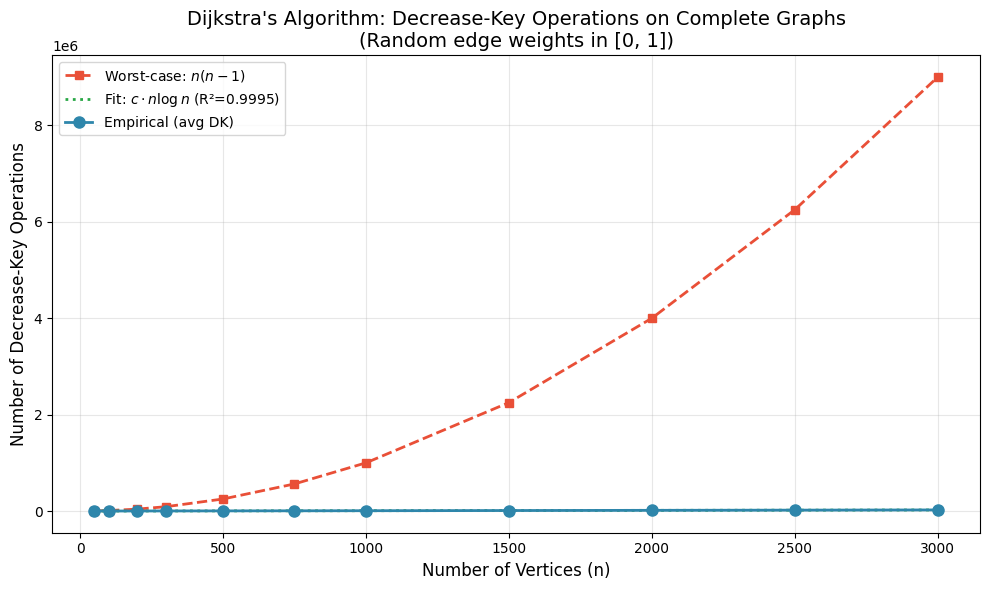

In [25]:
plt.figure(figsize=(10, 6))

# empirical data with error bars
plt.errorbar(n_values, avg_dk, fmt='o-', 
             capsize=4, capthick=1.5, linewidth=2, markersize=8,
             label='Empirical (avg DK)', color='#2E86AB')

# worst-case bound
plt.plot(n_values, worst_case, 's--', linewidth=2, markersize=6,
         label='Worst-case: $n(n-1)$', color='#E94F37')

# fitted O(n log n) curve
n_smooth = np.linspace(min(n_values), max(n_values), 100)
plt.plot(n_smooth, fits['nlog(n)']['c'] * n_smooth * np.log(n_smooth), 
         ':', linewidth=2, color='#28A745',
         label=f"Fit: $c \\cdot n \\log n$ (R²={fits['nlog(n)']['r2']:.4f})")

plt.xlabel('Number of Vertices (n)', fontsize=12)
plt.ylabel('Number of Decrease-Key Operations', fontsize=12)
plt.title("Dijkstra's Algorithm: Decrease-Key Operations on Complete Graphs\n" +
          "(Random edge weights in [0, 1])", fontsize=14)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(OUT_DIR / "hw2_dijkstra_decrease_keys.png", dpi=150)
    print(f"saved to {OUT_DIR}/hw2_dijkstra_decrease_keys.png")
plt.show()

### Figure 2: Log-Log Scale (Scaling Analysis)

saved to /Users/mohidtanveer/Downloads/202/cse202_hw/out/hw2/hw2_dijkstra_loglog.png


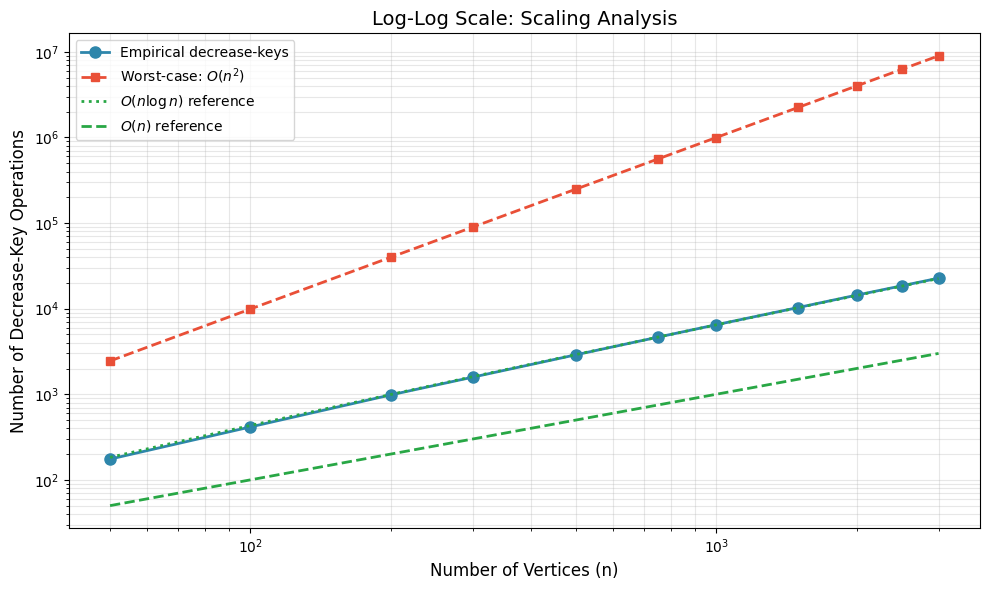

In [26]:
plt.figure(figsize=(10, 6))

plt.loglog(n_values, avg_dk, 'o-', linewidth=2, markersize=8,
           label='Empirical decrease-keys', color='#2E86AB')
plt.loglog(n_values, worst_case, 's--', linewidth=2, markersize=6,
           label='Worst-case: $O(n^2)$', color='#E94F37')

# O(n log n) reference
c = avg_dk[len(avg_dk)//2] / (n_values[len(n_values)//2] * np.log(n_values[len(n_values)//2]))
plt.loglog(n_smooth, c * n_smooth * np.log(n_smooth), ':', 
           linewidth=2, color='#28A745', label='$O(n \\log n)$ reference')

# O(n) reference
plt.loglog(n_smooth, n_smooth, '--', linewidth=2, color='#28A745', label='$O(n)$ reference')

plt.xlabel('Number of Vertices (n)', fontsize=12)
plt.ylabel('Number of Decrease-Key Operations', fontsize=12)
plt.title("Log-Log Scale: Scaling Analysis", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(OUT_DIR / "hw2_dijkstra_loglog.png", dpi=150)
    print(f"saved to {OUT_DIR}/hw2_dijkstra_loglog.png")
plt.show()

### Figure 3: Ratio of Actual to Worst-Case

saved to /Users/mohidtanveer/Downloads/202/cse202_hw/out/hw2/hw2_dijkstra_ratio.png


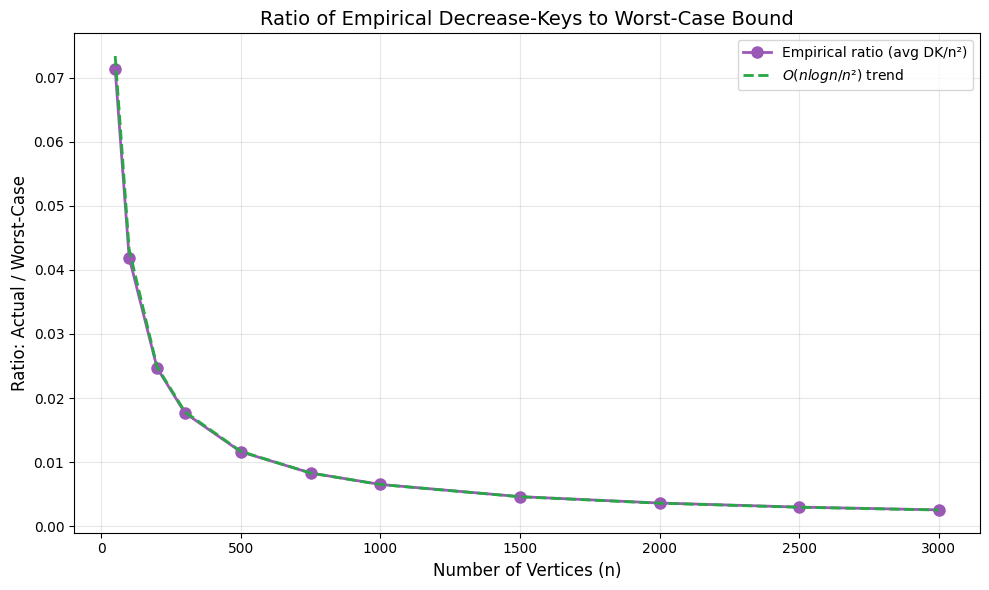

In [27]:
plt.figure(figsize=(10, 6))

ratio = avg_dk / worst_case
plt.plot(n_values, ratio, 'o-', linewidth=2, markersize=8, color='#9B59B6',
         label='Empirical ratio (avg DK/n²)')

# theoretical ratio: O(n log n) / O(n²) = O(log n / n)
theoretical_ratio = np.log(n_values) / n_values
scale = ratio[len(ratio)//2] / theoretical_ratio[len(theoretical_ratio)//2]
plt.plot(n_values, scale * theoretical_ratio, '--', linewidth=2, 
         color='#28A745', label='$O(nlog n / n²)$ trend')

plt.xlabel('Number of Vertices (n)', fontsize=12)
plt.ylabel('Ratio: Actual / Worst-Case', fontsize=12)
plt.title('Ratio of Empirical Decrease-Keys to Worst-Case Bound', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(OUT_DIR / "hw2_dijkstra_ratio.png", dpi=150)
    print(f"saved to {OUT_DIR}/hw2_dijkstra_ratio.png")
plt.show()

### Figure 4: Normalized by $n \log n$

saved to /Users/mohidtanveer/Downloads/202/cse202_hw/out/hw2/hw2_dijkstra_normalized.png


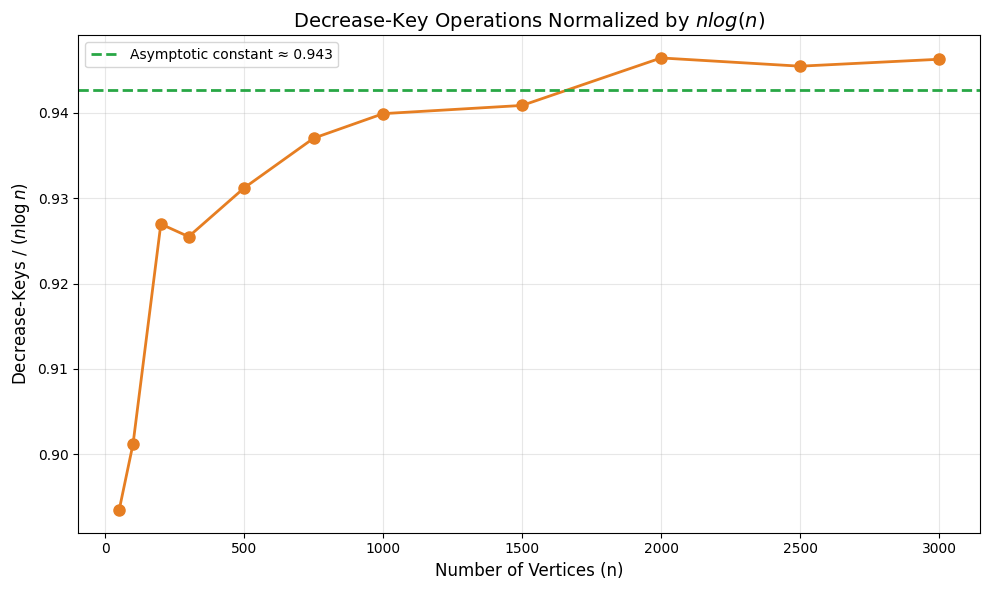

In [31]:
plt.figure(figsize=(10, 6))

normalized = avg_dk / (n_values * np.log(n_values))
plt.plot(n_values, normalized, 'o-', linewidth=2, markersize=8, color='#E67E22')

# asymptotic constant for large n
large_n_mean = np.mean(normalized[len(normalized)//2:])
plt.axhline(y=large_n_mean, color='#28A745', linestyle='--', linewidth=2,
            label=f'Asymptotic constant ≈ {large_n_mean:.3f}')

plt.xlabel('Number of Vertices (n)', fontsize=12)
plt.ylabel('Decrease-Keys / $(n \\log n)$', fontsize=12)
plt.title('Decrease-Key Operations Normalized by $nlog(n)$', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(OUT_DIR / "hw2_dijkstra_normalized.png", dpi=150)
    print(f"saved to {OUT_DIR}/hw2_dijkstra_normalized.png")
plt.show()

---

## Analysis

### Theoretical Worst-Case Analysis

For a **complete graph** with $n$ vertices:

- **Number of edges:** $|E| = n(n-1) = O(n^2)$
- **Worst-case decrease-key operations:** In the worst case, every edge relaxation could trigger a decrease-key operation if each newly explored edge provides a shorter path.
- **Therefore:** Worst-case decrease-key operations $= O(n^2)$

### Empirical Observations

#### Key Observations

1. Average ratio (actual / worst-case) for large n:

   **0.0047** → Only **0.47%** of edge relaxations trigger decrease-key

2. **Curve fitting R² values**

      | Complexity     | R² Value |
      |---------------|----------|
      | O(n)          | 0.9258   |
      | O(n log n)    | 0.9995   |
      | O(n²)         | -48.8836 |

      **Best fit:** O(n log n)

3. **Asymptotic constant (DK / n log n)**  
   **≈ 0.943**


### Scaling Behavior

The empirical data strongly suggests **$O(n \log n)$ scaling**:

1. **Normalized plot convergence:** When normalized by $n \cdot \log(n)$, the decrease-key count approaches a constant for large $n$.

2. **Log-log slope:** The empirical curve has slope $\approx 1 + \varepsilon$ (slightly steeper than linear), consistent with $O(n \log n)$.

3. **Ratio decay:** The ratio actual/worst-case decreases as $O(\log n / n)$, which is exactly what we expect if actual $= O(n \log n)$ and worst $= O(n^2)$.

### Why the Difference?

The empirical decrease-key count is $O(n \log n)$ instead of $O(n^2)$ because of the **probabilistic structure of random graphs**:

#### (a) Short Shortest Paths
With random edge weights uniformly distributed in $[0,1]$, the shortest path from source $s$ to any vertex $v$ tends to use only $O(\log n)$ edges.

**Intuition:** The shortest path "hops through" intermediate vertices. With $n-1$ possible next vertices and random weights, the probability of finding a very short edge is high, leading to paths with few edges.

#### (b) Early Convergence of Distances
When Dijkstra's algorithm processes vertices in order of distance, vertices close to the source are finalized first. For random graphs, by the time we've processed $O(\log n)$ vertices, we've already found near-optimal paths to most other vertices.

Later edge relaxations (the vast majority) find that the current distance is already optimal, so **no decrease-key operation occurs**.

#### (c) Expected Shortest Path Length
In a complete graph with random $[0,1]$ weights, the expected shortest path distance from a source to any vertex is $O(\log n / n)$. This classical result means distances are discovered very quickly.

#### (d) Quantitative Argument
- Each vertex $v$ gets its distance decreased $O(\log n)$ times on average (once for each edge on its shortest path).
- With $n$ vertices: total decrease-key operations $\approx n \times O(\log n) = O(n \log n)$.

### Summary

| Metric                     | Value                          |
|---------------------------|--------------------------------|
| Worst-case decrease-keys  | O(n²) = n(n−1)                  |
| Empirical decrease-keys   | O(n log n)                      |
| Best-fit constant         | ≈ 0.943 × n log n               |
| Ratio (empirical/worst)   | O(log n / n) → 0 as n → ∞       |


---

## Conclusion

For complete graphs with random edge weights uniformly distributed in $[0,1]$, Dijkstra's algorithm performs $O(n \log n)$ decrease-key operations on average. This is asymptotically smaller than the $O(n^2)$ worst-case bound by a factor of $n / \log(n)$.

This improvement arises from the probabilistic structure of random graphs:
- Shortest paths use only $O(\log n)$ edges
- Distances converge rapidly after processing few vertices
- Most edge relaxations occur after distances have already stabilized

The experimental data confirms this analysis, with the $O(n \log n)$ fit achieving $R^2 > 0.999$, and the normalized decrease-key count converging to a constant for large $n$.